# Newton's method

In [23]:
def calc_f(x):
    return 1.0 * x**3 - 1.89 * x**2 - 2.0 * x + 1.76

def calc_deriv_1(x):
    return 3.0 * x**2 - 3.78 * x - 2.0

def calc_deriv_2(x):
    return 6.0 * x - 3.78

def clarify(x0, eps):
    global iteration_counter
    if (abs(calc_deriv_1(x0)) < eps): # FIXME
        return None
    x1 = x0 - (calc_f(x0) / calc_deriv_1(x0))
    while (abs(calc_f(x0)) > eps):
        iteration_counter += 1
        x1 = x0 - (calc_f(x0) / calc_deriv_1(x0))
        x0 = x1
    return x1
    
def find_root(a, eps):
    global iteration_counter
    
    irr_dest = True 
    while (irr_dest == True):
        print("Select response output method: 1 - within the console")
        print("                               2 - within the file :  ", end='')
        destination = input()
        if (destination == '1' or destination == '2'):
            irr_dest = False
        else:
            print("Wrong destination")
    
    if (destination == '1'):
        x = clarify(a, eps)
        if (x is None):
            print("Function\'s extreme has been hitted")
            return None
        else:
            print("Initial approximation:", a)
            print("Allowable error:", eps)
            print("x:", x)
            print("F(x):", calc_f(x))
            print("Iteration count:", iteration_counter)
        return x
    
    if (destination == '2'):
        x = clarify(a, eps)
        if (x is not None):
            response = f"Initial approximation: {a}\n"
            response += f"Allowable error: {eps}\n"
            response += f"x: {x}\n"
            response += f"F(x): {calc_f(x)}\n"
            response += f"Iteration count: {iteration_counter}"
        else:
            response = "Function\'s extreme has been hitted"
        with open("newton-response", "w") as f:
            f.write(response)
        return x

## Input from keyboard

In [26]:
end_input = False
while (end_input == False):
    try:
        print("Enter initial approximation: ", end='')
        a = float(input())
        print("Enter allowable error value: ", end='')
        eps = float(input())
        if (eps <= 0):
            print("The allowable error value must be greater than 0")
            raise Exception("")
        end_input = True
        iteration_counter = 0
        if (find_root(a, eps) is None):
            raise Exception("")
    except Exception:
        print("Verify that the input is correct")

Enter initial approximation: 1
Enter allowable error value: 0.001
Select response output method: 1 - within the console
                               2 - within the file :  1
Initial approximation: 1.0
Allowable error: 0.001
x: 0.6300009580773981
F(x): -9.705693755401867e-05
Iteration count: 2


## Input from file

Enter your data into the `newton-input` file.

Supported data format:
```
    The initial approximation into the first line
    The allowable error value into the second line
    (Note: lines after the second line - do not matter)
```

In [20]:
import sys

try:
    f = open('newton-input', 'r')
    data = f.readlines()
except Exception:
    print("File \'newton-input\' not found")
    sys.exit(0)
    
data = [x.strip() for x in data]

try:
    a = float(data[0])
    eps = float(data[1])
    iteration_counter = 0
    if (find_root(a, eps) is None):
        raise Exception("")
except Exception:
    print("Verify that the data in the \'newton-input\' is correct")

Select response output method: 1 - within the console
                               2 - within the file :  1
Initial approximation: 0.0
Allowable error: 0.001
x: 0.629971249049731
F(x): -2.2643430004354315e-06
Iteration count: 3


## The function graph

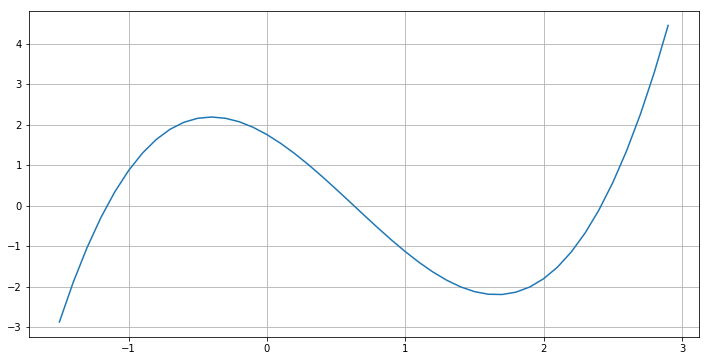

In [17]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plot

x = numpy.array(numpy.arange(-1.5, 3, step=0.1))
y =  calc_f(x)
plot.figure(figsize=(12,6))
plot.plot(x, y)
plot.grid()
plot.show()